In [2]:

## Which is the best predictor for taxi-out? 
## This dataset is about flights leaving from JKF ariport between Nov 2019-Dec-2020

## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
## read from csv file
data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
## checking the data for null values: 2 missing values in the wind column
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [40]:
#information about the dataset: 28820 entries and 23variables
data.info()

#getting statistics summary about each variable
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              28818 non-null  int64  
 1   day_of_month       28818 non-null  int64  
 2   day_of_week        28818 non-null  int64  
 3   op_unique_carrier  28818 non-null  object 
 4   tail_num           28818 non-null  object 
 5   dest               28818 non-null  object 
 6   dep_delay          28818 non-null  int64  
 7   crs_elapsed_time   28818 non-null  int64  
 8   distance           28818 non-null  int64  
 9   crs_dep_m          28818 non-null  int64  
 10  dep_time_m         28818 non-null  int64  
 11  crs_arr_m          28818 non-null  int64  
 12  temperature        28818 non-null  int64  
 13  dew point          28818 non-null  object 
 14  humidity           28818 non-null  int64  
 15  wind               28818 non-null  object 
 16  wind speed         28818 no

,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,humidity,wind speed,wind gust,pressure,sch_dep,sch_arr,taxi_out
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [5]:
## converting all columns names to lower case (also data.columns = [x.lower() for x in data.columns])
data.columns = map(str.lower, data.columns)

## removing 2 records as values in wind catagory is missing that won't affect data distribution 
data = data.dropna()


In [32]:
## finding the frequency distriution
taxi_out_counts = data['taxi_out'].value_counts().rename_axis('unique_values').reset_index(name='counts')
taxi_out_counts['unique_values'].max() # 41 is the highest number of min for taxi-out
taxi_out_counts['unique_values'].min() # 5 is the lowest number of min for taxi-out

#sorting in ascending order of unique_values
taxi_out_counts_asc = taxi_out_counts.sort_values('unique_values')
taxi_out_counts_asc


,unique_values,counts
35,5,1
36,6,1
34,7,13
33,8,28
32,9,91
25,10,302
18,11,581
13,12,911
8,13,1354
6,14,1626


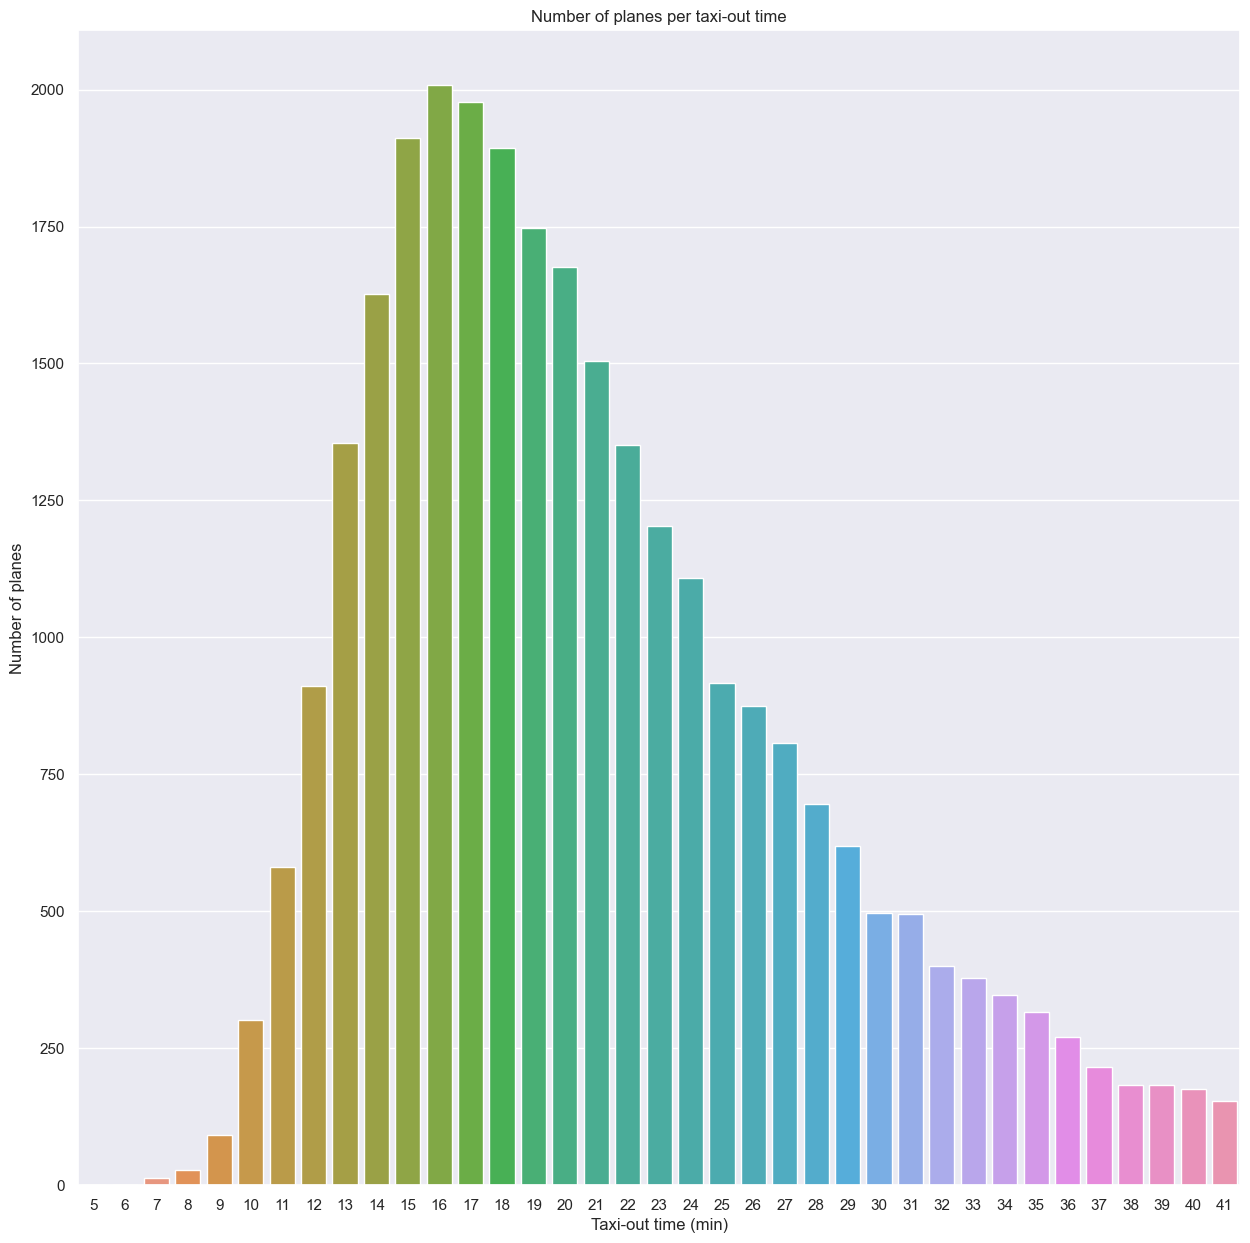

In [84]:

plt.figure(figsize=(15,15))

sns.set(style="darkgrid")
ax = sns.barplot(x = "unique_values", y = 'counts',data=taxi_out_counts_asc)

ax.set_title('Number of planes per taxi-out time')
ax.set(xlabel='Taxi-out time (min)', ylabel= 'Number of planes')
plt.show()


<Axes: >

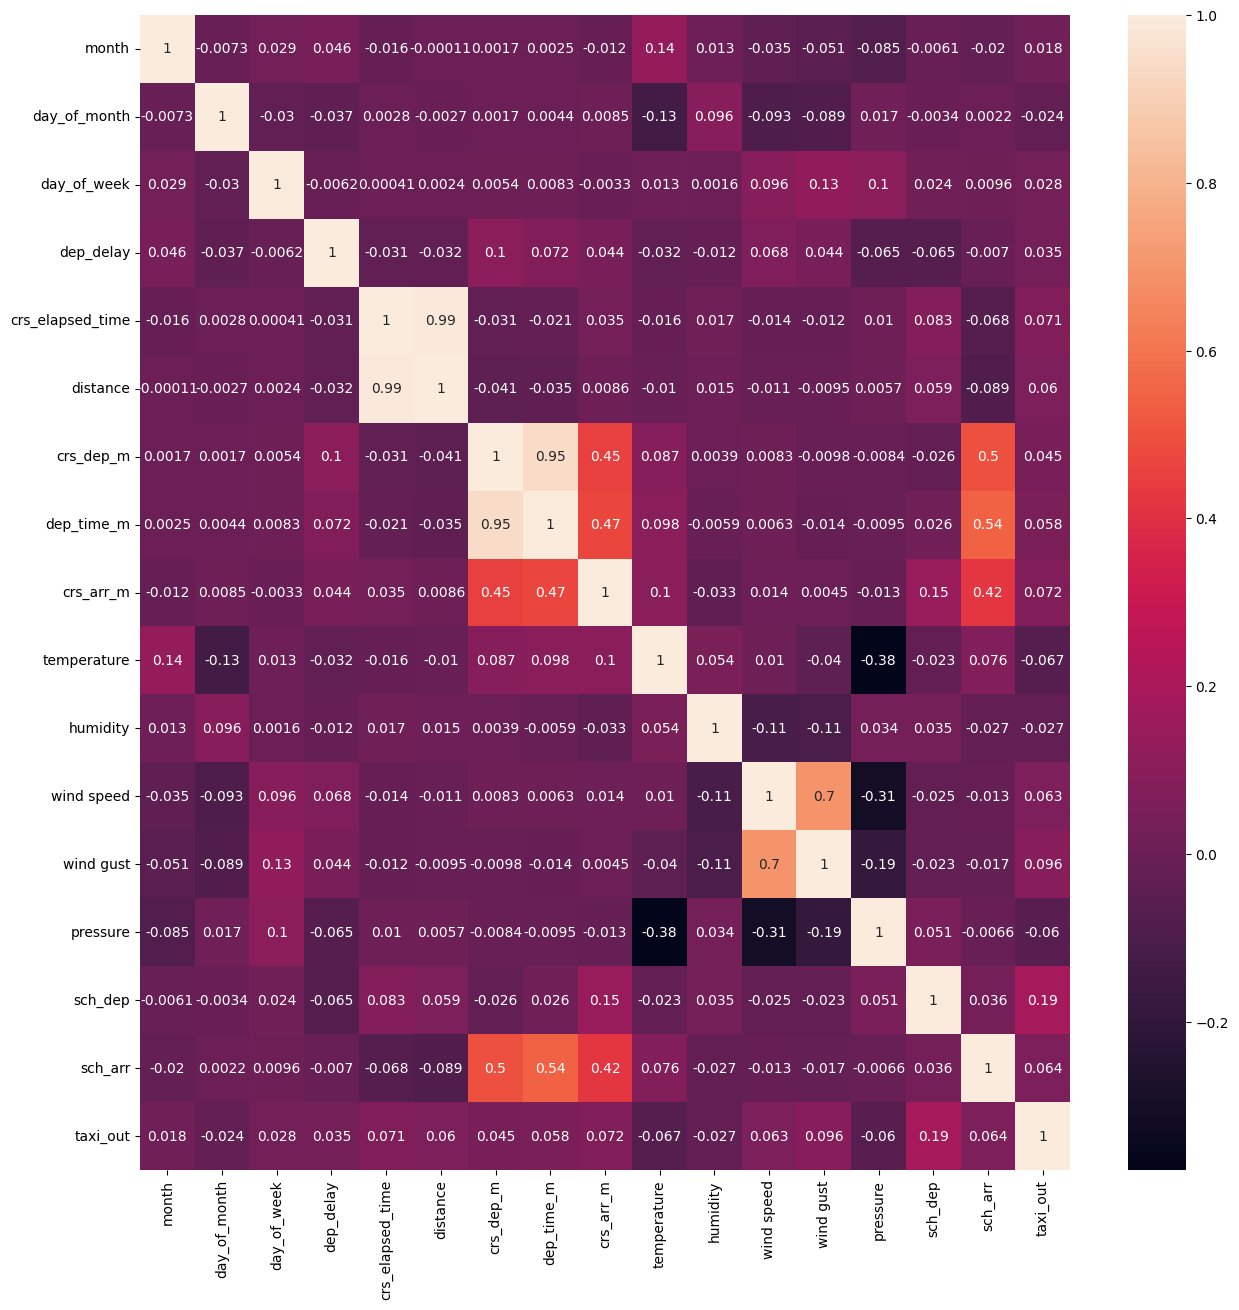

In [21]:
## check for correlation
corr_mat = data.corr(numeric_only=True)
corr_mat

## show correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True)

In [69]:
## Model 0 : Linear Regression with the highest correlated variables



## splitting the dependent and independent variable #with .values pandas df becomes np array
X = data.loc[:, ["sch_dep"]].values
y = data.loc[:, ["taxi_out"]].values

## data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## feature scaling between large IQR between crs_elapsed_time and other variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

## predicion on unseen data
y_pred = lin_reg.predict(X_test)

## create a dataframe that will show the actual closing stock price and the predicted stock price
pred = pd.DataFrame({'Actual Value': list(y_test), 'Predicted Value': list(y_pred)})
pred

meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(lin_reg.score(X_test, y_test)))
print('Mean Absolute Error: ', meanAbError)
print('Mean Square Error: ', meanSqError)
print('Root Mean Square Error: ', rootMeanSqrr)



R squared: 0.04
Mean Absolute Error:  5.353282616449877
Mean Square Error:  45.10840350858983
Root Mean Square Error:  6.716278992760041


In [70]:
## Model 2 : Multiple Regression with the top 3 highest correlated variables :
#sch_dep (number of flights scheduled for departure) at 0.19
#Wind gust: 0.096
#Crs_elapsed_time (schedule journey time of the flight):  0.071


## splitting the dependent and independent variable #with .values pandas df becomes np array
X1 = data.loc[:, ["sch_dep","wind gust","crs_elapsed_time"]].values
y1 = data.loc[:, ["taxi_out"]].values

## data splitting
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 32)

## feature scaling between large IQR between crs_elapsed_time and other variables
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

## linear regression
lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train, y1_train)

## predicion on unseen data
y_pred1 = lin_reg1.predict(X1_test)

## create a dataframe that will show the actual closing stock price and the predicted stock price
pred1 = pd.DataFrame({'Actual Value': list(y1_test), 'Predicted Value': list(y_pred1)})
pred1

meanAbError1 = metrics.mean_absolute_error(y1_test, y_pred1)
meanSqError1 = metrics.mean_squared_error(y1_test, y_pred1)
rootMeanSqrr1 = np.sqrt(metrics.mean_squared_error(y1_test, y_pred1))

print('R squared: {:.2f}'.format(lin_reg1.score(X1_test, y1_test)))
print('Mean Absolute Error: ', meanAbError1)
print('Mean Square Error: ', meanSqError1)
print('Root Mean Square Error: ', rootMeanSqrr1)



R squared: 0.05
Mean Absolute Error:  5.318760437051704
Mean Square Error:  44.56825084333637
Root Mean Square Error:  6.675945689064312


In [79]:
## Model 3: Multiple Regression with all the numerical variables :


## getting only the numeric variables for the multiple regression which will include all the numerical variables
data_numeric = data._get_numeric_data()
data_numeric


## splitting the dependent and independent variable #with .values pandas df becomes np array
X2 = data_numeric.iloc[:,0:16].values
y2 = data_numeric.iloc[:,16].values

## data splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 32)

## feature scaling between large IQR between crs_elapsed_time and other variables
sc2 = StandardScaler()
X2_train = sc2.fit_transform(X2_train)
X2_test = sc2.transform(X2_test)

## linear regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)

## predicion on unseen data
y_pred2 = lin_reg2.predict(X2_test)

## create a dataframe that will show the actual closing stock price and the predicted stock price
pred2 = pd.DataFrame({'Actual Value': list(y2_test), 'Predicted Value': list(y_pred2)})
pred2

meanAbError2 = metrics.mean_absolute_error(y2_test, y_pred2)
meanSqError2 = metrics.mean_squared_error(y2_test, y_pred2)
rootMeanSqrr2 = np.sqrt(metrics.mean_squared_error(y2_test, y_pred2))

print('R squared: {:.2f}'.format(lin_reg2.score(X2_test, y2_test)))
print('Mean Absolute Error: ', meanAbError2)
print('Mean Square Error: ', meanSqError2)
print('Root Mean Square Error: ', rootMeanSqrr2)

R squared: 0.07
Mean Absolute Error:  5.260479190557299
Mean Square Error:  43.62204291226953
Root Mean Square Error:  6.604698548175346


In [83]:
## more cleaning data is needed for further exploration:
# time series for taxi-out time by combinating the date variables into one 
# dropping number of flight as it's the flight's id